#  **Random Forest**


準確率： 0.7860696517412935

分類報告：
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       130
           1       0.75      0.59      0.66        71

    accuracy                           0.79       201
   macro avg       0.78      0.74      0.75       201
weighted avg       0.78      0.79      0.78       201



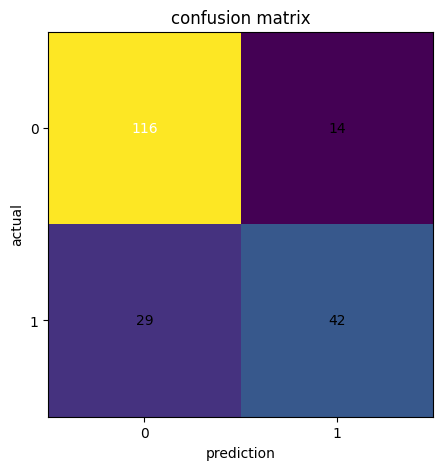


特徵重要性：
Glucose                     0.247270
BMI                         0.178116
Age                         0.125209
DiabetesPedigreeFunction    0.120485
BloodPressure               0.094920
Insulin                     0.080935
Pregnancies                 0.080464
SkinThickness               0.072602
dtype: float64


In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_file = "train_data_a.csv"
test_file = "test_data_a.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target = "Outcome"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("準確率：", accuracy)
print("\n分類報告：")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(conf_mat, interpolation='nearest')
plt.title("confusion matrix")
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("prediction")
plt.ylabel("actual")

thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, format(conf_mat[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_mat[i, j] > thresh else "black")
plt.show()

importances = rf_classifier.feature_importances_
feature_importances = pd.Series(importances, index=features)

print("\n特徵重要性：")
print(feature_importances.sort_values(ascending=False))


準確率： 0.82

分類報告：
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        63
           1       0.85      0.62      0.72        37

    accuracy                           0.82       100
   macro avg       0.83      0.78      0.79       100
weighted avg       0.82      0.82      0.81       100



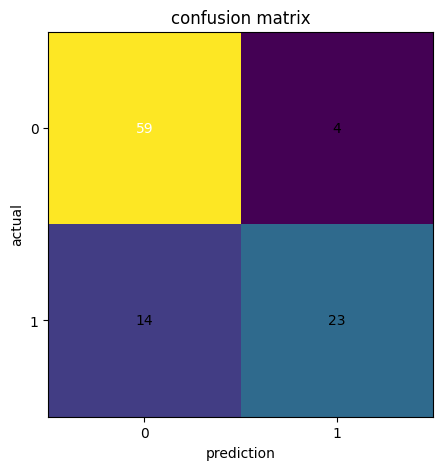


特徵重要性：
Glucose                     0.257049
BMI                         0.169493
Age                         0.136166
DiabetesPedigreeFunction    0.122459
BloodPressure               0.092250
Pregnancies                 0.084845
Insulin                     0.070932
SkinThickness               0.066805
dtype: float64


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_file = "train_data_b.csv"
test_file = "test_data_b.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target = "Outcome"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("準確率：", accuracy)
print("\n分類報告：")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(conf_mat, interpolation='nearest')
plt.title("confusion matrix")
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("prediction")
plt.ylabel("actual")

thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, format(conf_mat[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_mat[i, j] > thresh else "black")
plt.show()

importances = rf_classifier.feature_importances_
feature_importances = pd.Series(importances, index=features)

print("\n特徵重要性：")
print(feature_importances.sort_values(ascending=False))


# **k-means + SVM**

準確率： 0.8059701492537313

分類報告：
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       130
           1       0.81      0.59      0.68        71

    accuracy                           0.81       201
   macro avg       0.81      0.76      0.77       201
weighted avg       0.81      0.81      0.80       201



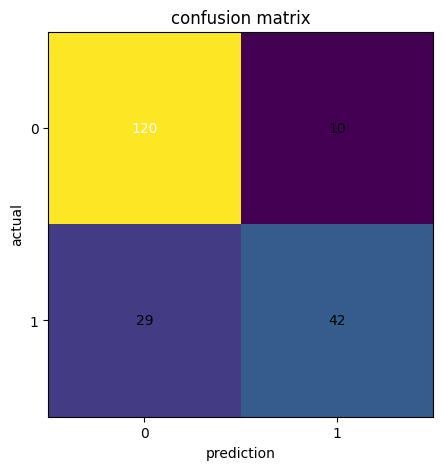

In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_file = "train_data_a.csv"
test_file = "test_data_a.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target = "Outcome"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled)

train_cluster_labels = kmeans.predict(X_train_scaled).reshape(-1, 1)
test_cluster_labels = kmeans.predict(X_test_scaled).reshape(-1, 1)

train_cluster_distances = kmeans.transform(X_train_scaled)
test_cluster_distances = kmeans.transform(X_test_scaled)

X_train_new = np.hstack((X_train_scaled, train_cluster_labels, train_cluster_distances))
X_test_new = np.hstack((X_test_scaled, test_cluster_labels, test_cluster_distances))

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_new, y_train)

y_pred = svm_classifier.predict(X_test_new)

accuracy = accuracy_score(y_test, y_pred)
print("準確率：", accuracy)
print("\n分類報告：")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(conf_mat, interpolation='nearest')
plt.title("confusion matrix")
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("prediction")
plt.ylabel("actual")

thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, format(conf_mat[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_mat[i, j] > thresh else "black")
plt.show()


準確率： 0.8

分類報告：
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        63
           1       0.87      0.54      0.67        37

    accuracy                           0.80       100
   macro avg       0.82      0.75      0.76       100
weighted avg       0.81      0.80      0.79       100



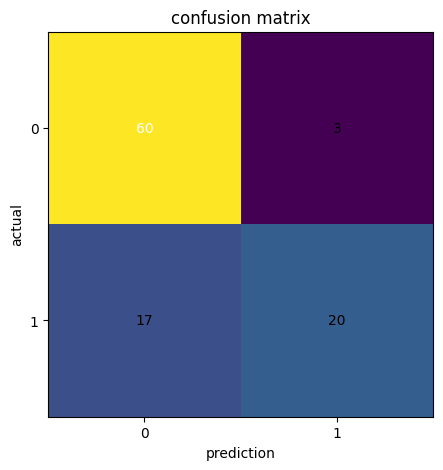

In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

train_file = "train_data_b.csv"
test_file = "test_data_b.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
target = "Outcome"

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled)

train_cluster_labels = kmeans.predict(X_train_scaled).reshape(-1, 1)
test_cluster_labels = kmeans.predict(X_test_scaled).reshape(-1, 1)

train_cluster_distances = kmeans.transform(X_train_scaled)
test_cluster_distances = kmeans.transform(X_test_scaled)

X_train_new = np.hstack((X_train_scaled, train_cluster_labels, train_cluster_distances))
X_test_new = np.hstack((X_test_scaled, test_cluster_labels, test_cluster_distances))

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_new, y_train)

y_pred = svm_classifier.predict(X_test_new)

accuracy = accuracy_score(y_test, y_pred)
print("準確率：", accuracy)
print("\n分類報告：")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(conf_mat, interpolation='nearest')
plt.title("confusion matrix")
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("prediction")
plt.ylabel("actual")

thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, format(conf_mat[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_mat[i, j] > thresh else "black")
plt.show()
